# INTRODUCTION
1. Read datas
1. Poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. High school graduation rate of the population that is older than 25 in states
1. Percentage of state's population according to races that are black,white,native american, asian and hispanic
1. High school graduation rate vs Poverty rate of each state
1. Kill properties
    * Manner of death
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
    * Having body cameras or not for police
1. Race rates according to states in kill data 
1. Kill numbers from states in kill data
1. Plotly Visualization Tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners
<br>
<br>
Plot Contents:
* [Bar Plot](#1)
* [Point Plot](#2)
* [Joint Plot](#3)
* [Pie Chart](#4)
* [Lm Plot](#5)
* [Kde Plot](#6)
* [Violin Plot](#7)
* [Heatmap](#8)
* [Box Plot](#9)
* [Swarm Plot](#10)
* [Pair Plot](#11)
* [Count Plot](#12)
    


In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



In [113]:
# Read datas
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [114]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [115]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [116]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
10.9     128
4.4      126
6.3      126
11.5     125
8.3      125
7.9      123
10.2     122
5.9      122
11.1     122
8.7      122
8.6      122
14.3     121
12.8     121
8.8      121
8.5      120
9.1      120
13.5     120
10.8     118
16       118
11.2     118
9.3      118
15.4     118
7.6      117
7.5      117
11.3     117
        ... 
71.8       1
50.6       1
98.6       1
81.2       1
78.5       1
62.2       1
86.7       1
93.4       1
77         1
81.5       1
0.1        1
62.3       1
56.7       1
83.3       1
74.1       1
65         1
63.1       1
54.2       1
78.1       1
67.5       1
55.9       1
90.9       1
67.1       1
85.7       1
60.7       1
70.7       1
73         1
81.9       1
74.3       1
77.4       1
Name: poverty_rate, Length: 771, dtype: int64

In [117]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

<a id="1"></a> 
## Bar Plot

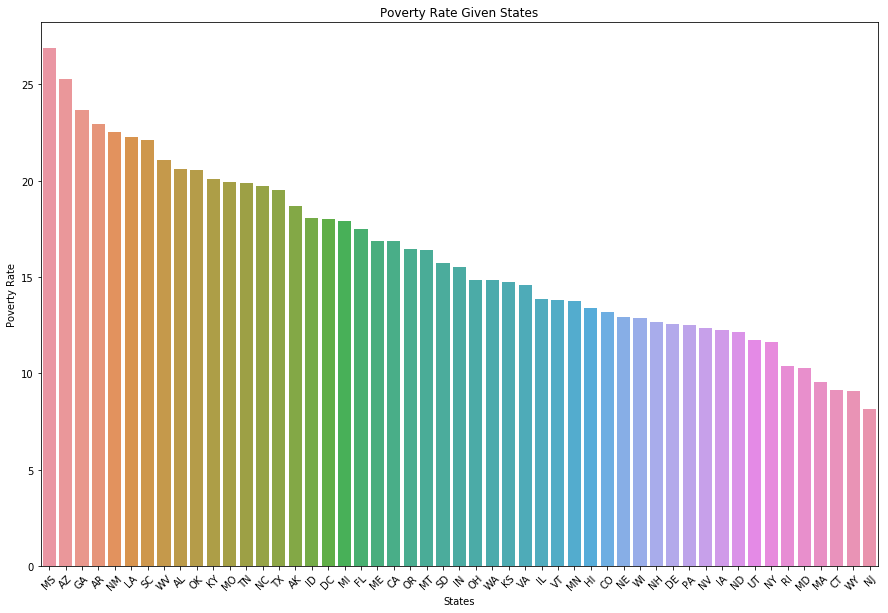

In [118]:
# Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True) # replace '-' with 0 
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float) # change from string to float
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.show()

In [119]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [120]:
kill.name.value_counts()

TK TK                           49
Daquan Antonio Westbrook         2
TK Tk                            2
Michael Brown                    2
Eric Harris                      2
Brandon Jones                    2
Michael Johnson                  2
Paul Carr Palmer                 1
Tevin Barkley                    1
Angelo Brown                     1
Michael J. Brennan               1
James Monroe Barrett             1
Todd Tomlinson                   1
Brock Nichols                    1
Cesar Cuellar                    1
Michael Noel                     1
Ricardo Tenorio                  1
Jacob Taulbee                    1
Robert Dapkus                    1
Kyle Zimbelman                   1
David Parker                     1
Robert James Hess                1
Charly Leundeu Keunang           1
Earl Hicks                       1
Calvin McKinnis                  1
Christopher Dalton Sexton        1
Desmond Luster                   1
Alexander J. Schoessel           1
John Martin Whittake

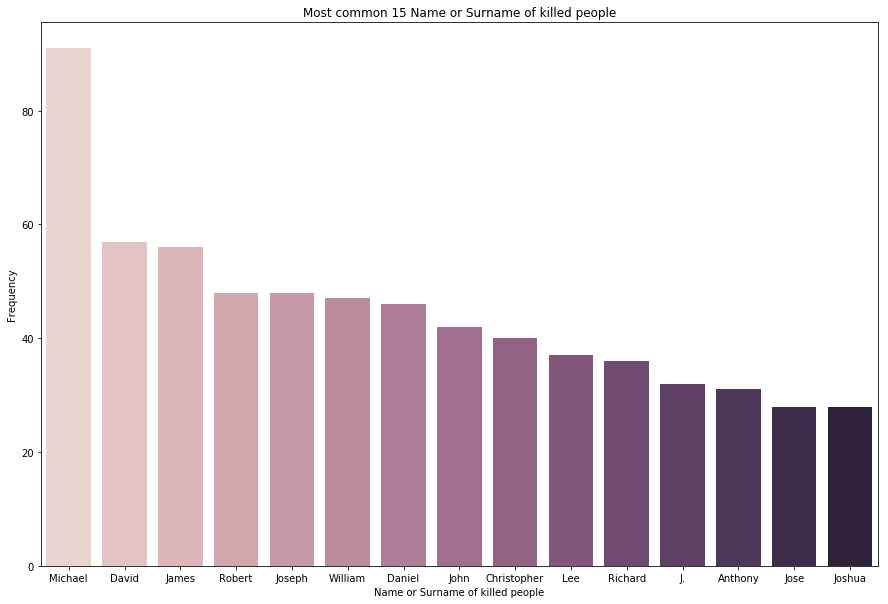

In [121]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')
plt.show()

In [122]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [123]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [124]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
92.7     158
91.9     158
92.2     157
93.4     156
90.9     156
89.7     153
91.1     150
93.9     150
89.4     150
90.2     149
91.6     148
91.5     147
88.1     146
93.6     146
92.6     146
89.1     145
90.4     145
94.3     144
92.4     142
89.5     142
        ... 
18.8       1
21.8       1
13.2       1
52         1
11.8       1
25.5       1
16.1       1
36.4       1
43.8       1
13.6       1
6.3        1
21.2       1
37.3       1
20.6       1
46.1       1
28.5       1
17.7       1
24.9       1
15.5       1
41         1
54.7       1
38.6       1
8.3        1
39.8       1
22.5       1
13.3       1
38.4       1
22.9       1
11.1       1
38.2       1
Name: percent_completed_hs, Length: 728, dtype: int64

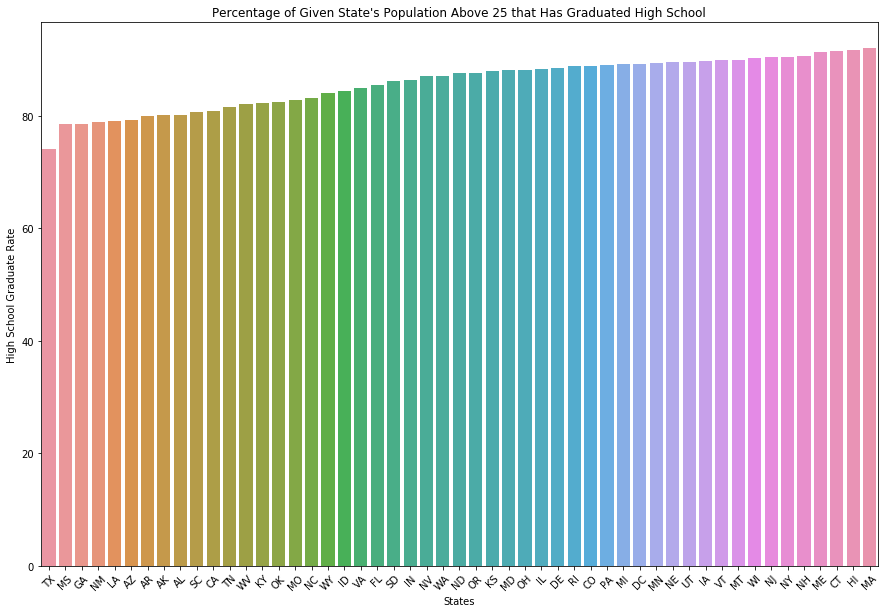

In [125]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True) # replace '-' with 0 
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float) # change from string to float
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.show()

In [126]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [127]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [128]:
share_race_city.share_white.value_counts()

100     1051
97.7     298
96.9     294
98.2     289
97.3     287
97.8     281
97.4     278
98.3     274
97.5     271
97.6     264
97       261
98.1     259
97.1     259
97.9     253
96.7     253
97.2     250
96.6     250
98       249
98.8     242
96.5     241
96.8     238
98.5     238
95.9     232
96.3     228
98.4     227
96       225
96.4     224
96.2     221
95.8     221
98.6     217
        ... 
44.3       2
35         2
22.4       2
24         1
8.2        1
19.3       1
15.7       1
20.3       1
14.4       1
9.5        1
16.5       1
21.8       1
22.5       1
13.3       1
0.2        1
24.1       1
35.1       1
9.3        1
36.3       1
27.9       1
32.5       1
33.7       1
19         1
10.9       1
20.7       1
9.7        1
24.4       1
16.9       1
34.5       1
13.4       1
Name: share_white, Length: 997, dtype: int64

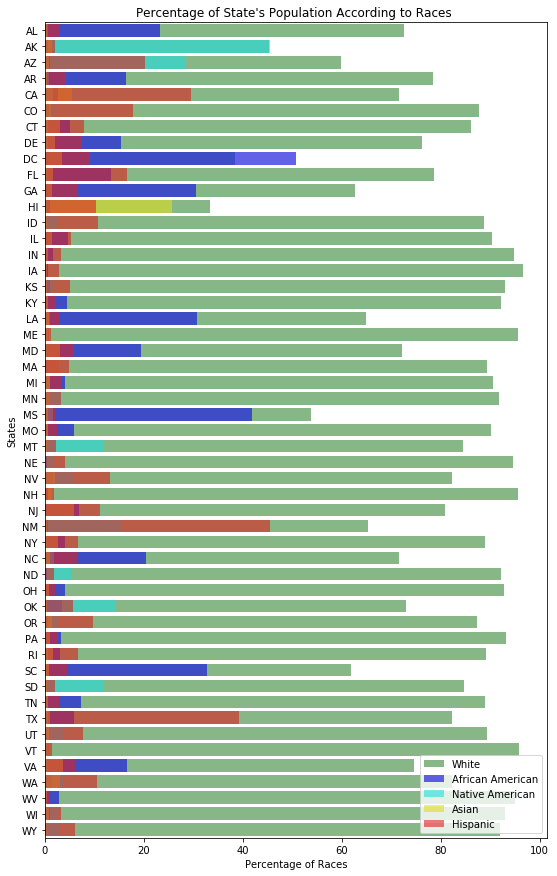

In [129]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")
plt.show()

<a id="2"></a>
## Point Plot

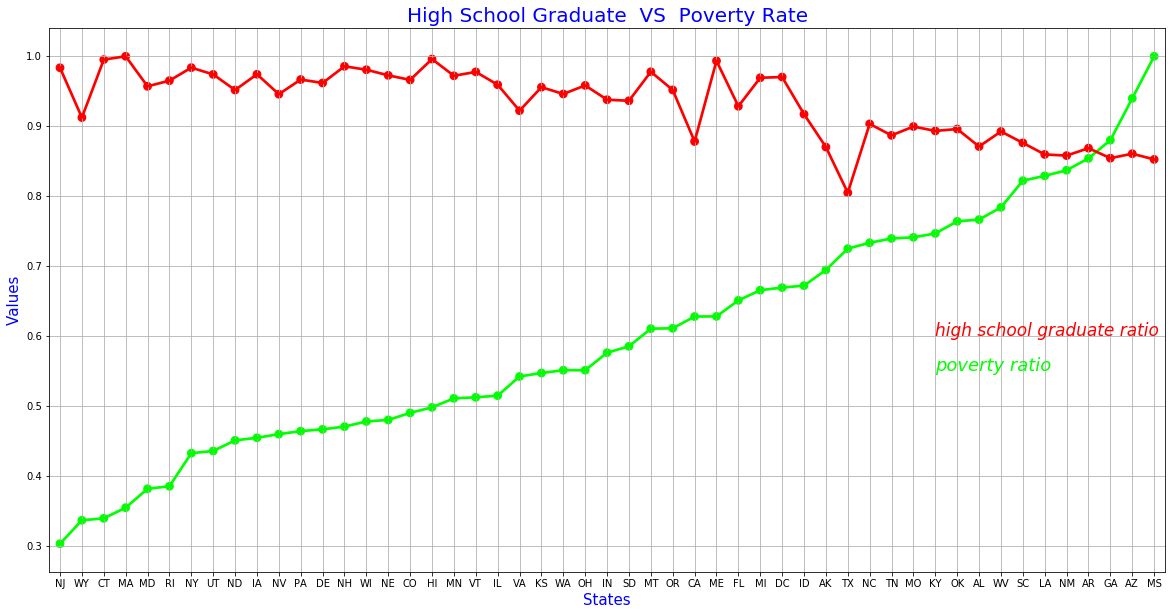

In [130]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

In [131]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


<a id="3"></a> 
## Joint Plot

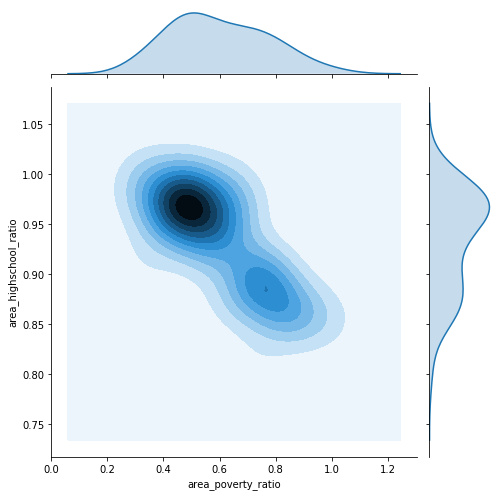

In [132]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

In [133]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


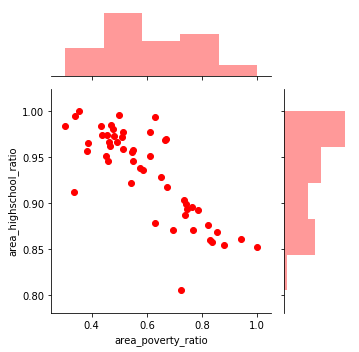

In [134]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")

<a id="4"></a> 
## Pie Chart

In [172]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [135]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [136]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

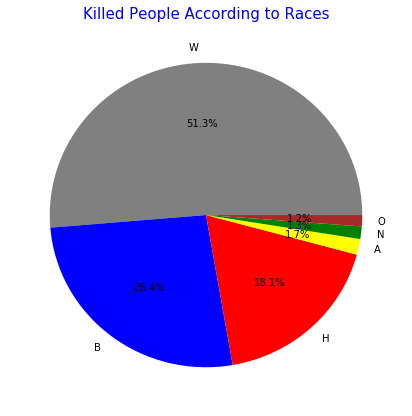

In [173]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)
plt.show()

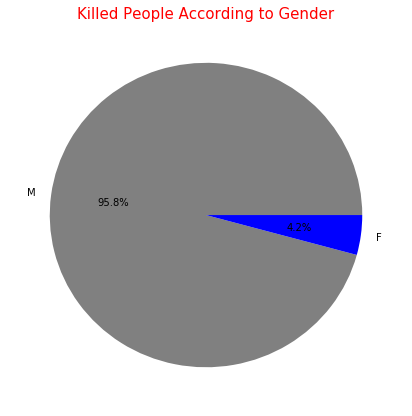

In [175]:
kill.gender.dropna(inplace = True)
labels = kill.gender.value_counts().index
colors = ['blue','yellow']
explode = [0,0]
sizes = kill.gender.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Gender',color = 'red',fontsize = 15)
plt.show()

<a id="5"></a> 
## Lm Plot

In [138]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


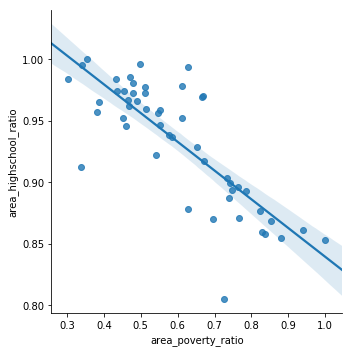

In [139]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

<a id="6"></a> 
## Kde Plot

In [140]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


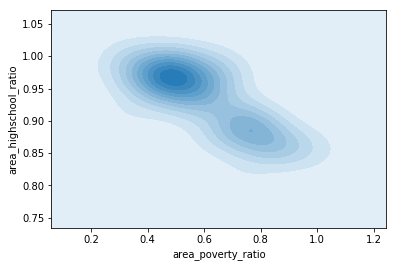

In [141]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3)
plt.show()

<a id="7"></a> 
## Violin Plot

In [142]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


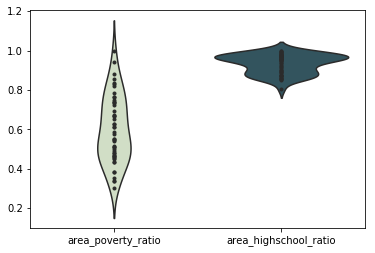

In [143]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

<a id="8"></a> 
## Heatmap

In [144]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


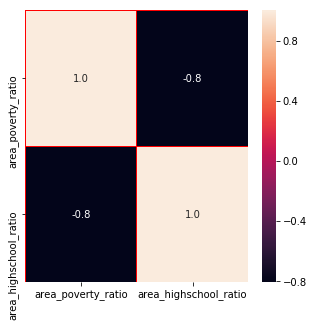

In [145]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="9"></a> 
## Box Plot

In [146]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [147]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

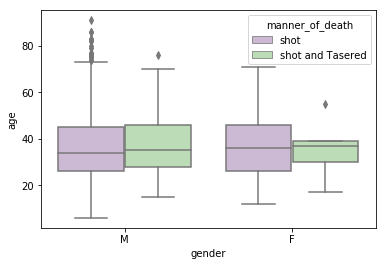

In [148]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

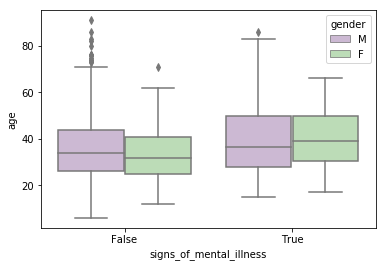

In [171]:
sns.boxplot(x="signs_of_mental_illness", y="age", hue="gender", data=kill, palette="PRGn")
plt.show()

<a id="10"></a> 
## Swarm Plot

In [149]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


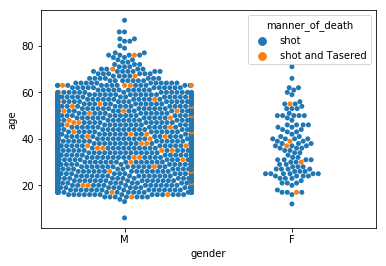

In [150]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

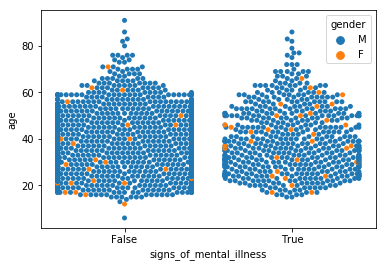

In [170]:
sns.swarmplot(x="signs_of_mental_illness", y="age",hue="gender", data=kill)
plt.show()

<a id="11"></a> 
## Pair Plot

In [151]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


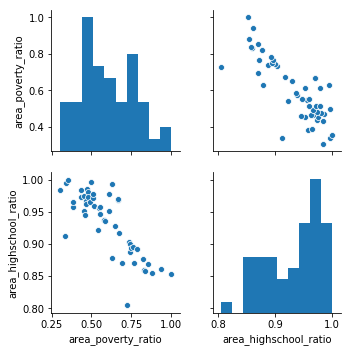

In [152]:
# pair plot
sns.pairplot(data)
plt.show()

<a id="12"></a> 
## Count Plot

In [153]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [154]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5,1,'gender')

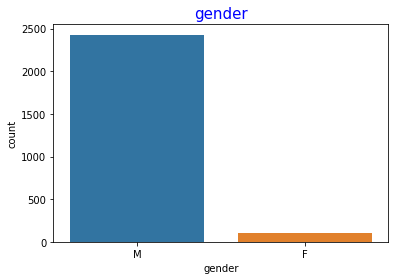

In [155]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5,1,'Kill weapon')

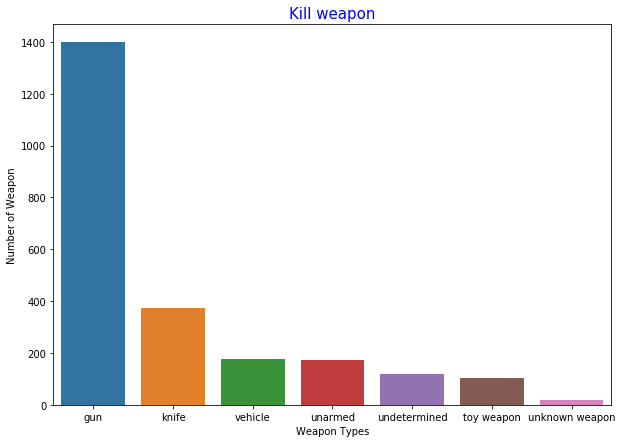

In [156]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5,1,'Age of killed people')

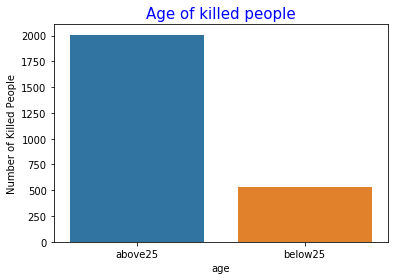

In [157]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

Text(0.5,1,'Race of killed people')

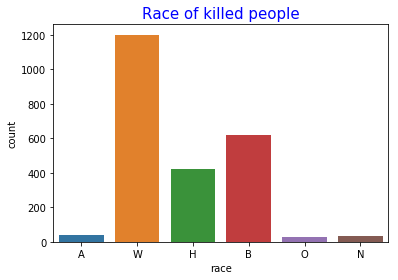

In [158]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5,1,'Most dangerous cities')

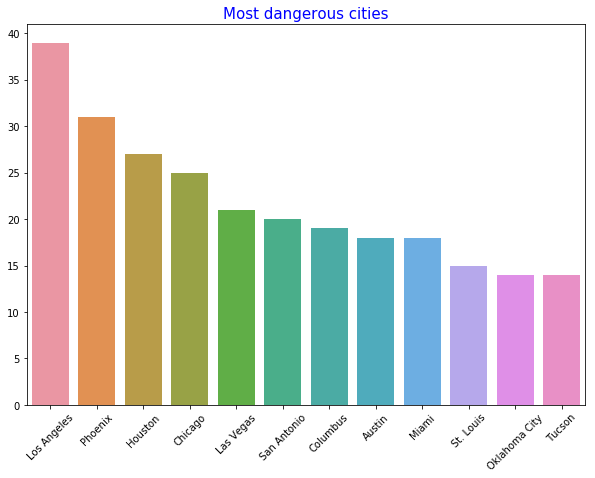

In [159]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

Text(0.5,1,'Most dangerous state')

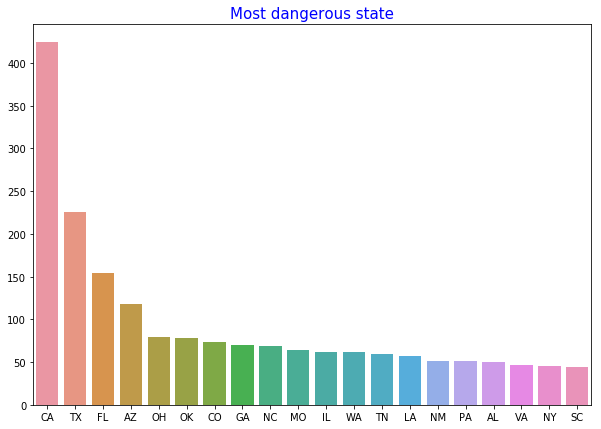

In [160]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

Text(0.5,1,'Having mental illness or not')

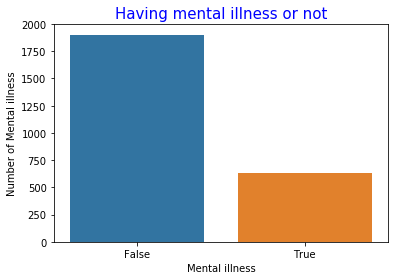

In [161]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

Text(0.5,1,'Threat types')

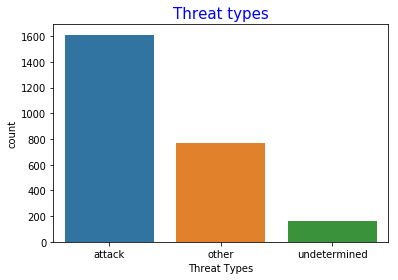

In [162]:
# Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5,1,'Flee types')

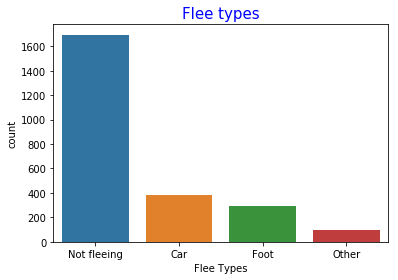

In [163]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

Text(0.5,1,'Having body cameras or not on Police')

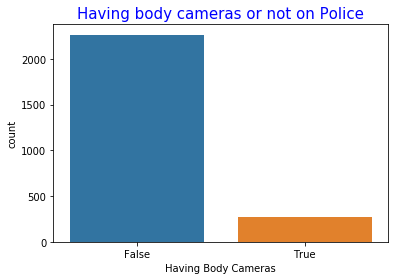

In [164]:
# Having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

Text(0.5,1,'Kill Numbers from States')

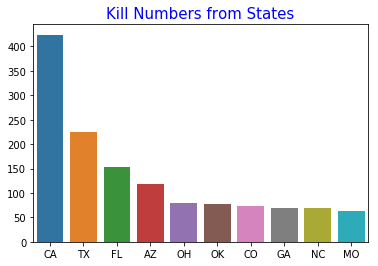

In [165]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)